In [89]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [90]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [91]:
len(x_train), len(x_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [92]:
x_train[0].shape

(28, 28)

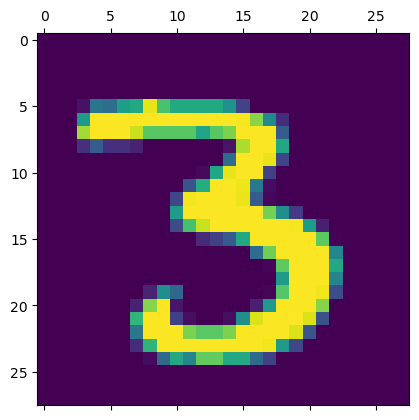

In [93]:
plt.matshow(x_train[12])

In [94]:
x_train =x_train.astype('float32')/255
x_test =x_test.astype('float32')/255

In [95]:
# x_train_flatten = x_train.reshape(len(x_train), 28*28)
# x_test_flatten = x_test.reshape(len(x_test), 28*28)
# x_train_flatten.shape, x_test_flatten.shape

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8707 - loss: 0.4634
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9615 - loss: 0.1344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.0916
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0501


In [98]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0969


[0.08324189484119415, 0.9745000004768372]

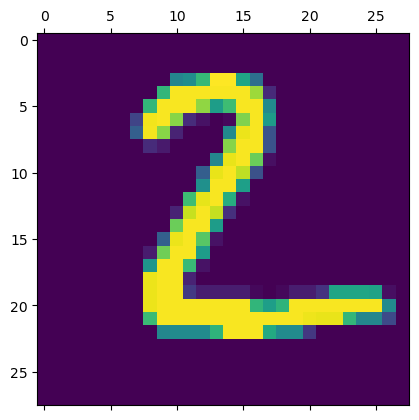

In [99]:
plt.matshow(x_test[1])

In [100]:
y_predicted = model.predict(x_test)
np.argmax(y_predicted[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


2

In [101]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test,predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'True labels')

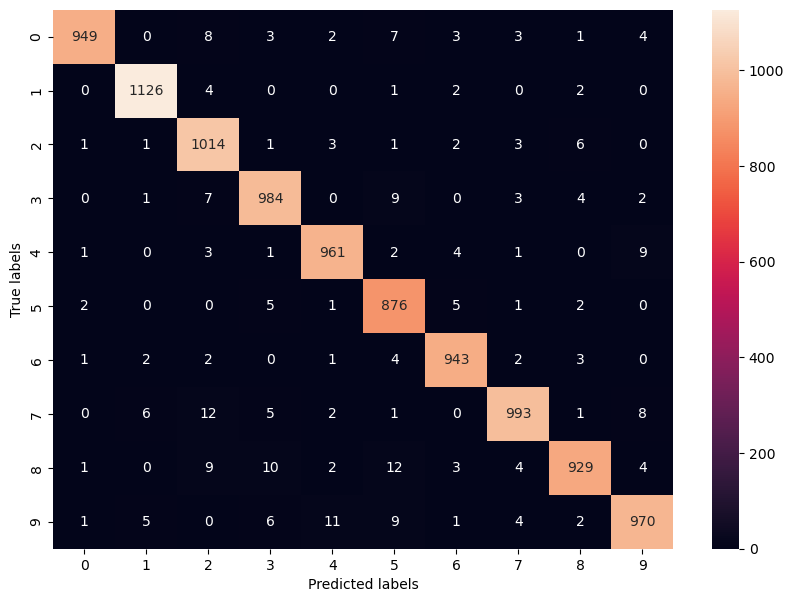

In [102]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')